In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

In [3]:
data = pd.read_csv(
    "data/github-companies/companies.csv"
)

In [4]:
data.head()

,Company,Repository,Stars,Watchers,Language
0,google,google/material-design-icons,31983,31983,CSS
1,google,google/material-design-lite,28842,28842,HTML
2,google,google/protobuf,20987,20987,C++
3,google,google/guava,19760,19760,Java
4,google,google/web-starter-kit,17713,17713,HTML


In [179]:
stars = data[["Company", "Stars"]].copy()
stars_count = stars.groupby(["Company"]).sum().sort_values("Stars", ascending=False)
stars_count


In [180]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:,})'.format(p=pct,v=val)
    return my_autopct

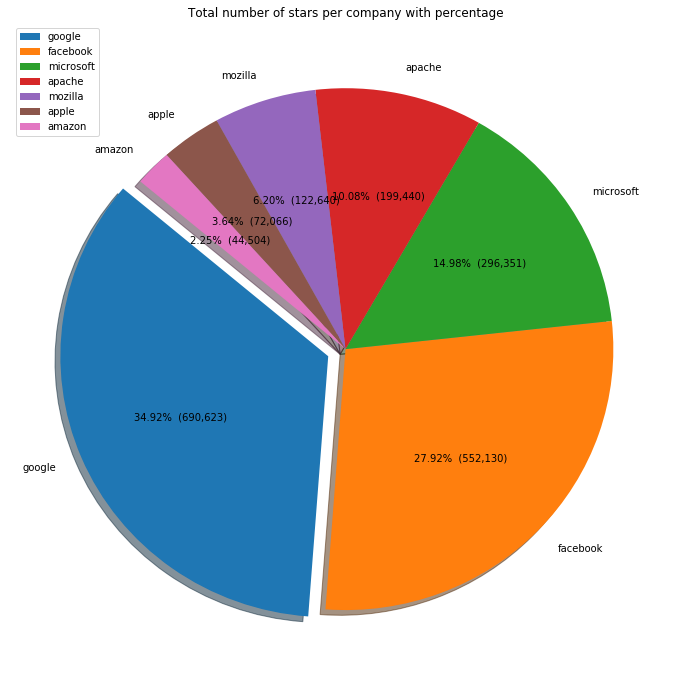

In [186]:
explode = (0.07, 0, 0, 0, 0, 0, 0)
stars_count.plot(kind="pie", y="Stars", autopct=make_autopct(stars_count["Stars"]),
                 explode=explode, shadow=True, startangle=140, figsize=(12,12), title="Total number of stars per company with percentage")
plt.ylabel('')
plt.savefig('data/github-companies/stars.png')


In [194]:
employees = {
    "google": 72053,
    "facebook" : 20658,
    "microsoft" : 124000,
    "mozilla" : 1050
}

In [195]:
stars_with_employees = stars_count.iloc[pd.np.r_[0:3, 4:5]].reset_index()
stars_with_employees


,Company,Stars
0,google,690623
1,facebook,552130
2,microsoft,296351
3,mozilla,122640


In [196]:
stars_with_employees["Employees"] = stars_with_employees["Company"].map(employees)
stars_with_employees

,Company,Stars,Employees
0,google,690623,72053
1,facebook,552130,20658
2,microsoft,296351,124000
3,mozilla,122640,1050


In [197]:
stars_with_employees["stars_per_employee"] = stars_with_employees.apply(lambda x: round(x.Stars / x.Employees,1), axis = 1)
stars_with_employees.sort_values("stars_per_employee", ascending=False)

,Company,Stars,Employees,stars_per_employee
3,mozilla,122640,1050,116.8
1,facebook,552130,20658,26.7
0,google,690623,72053,9.6
2,microsoft,296351,124000,2.4


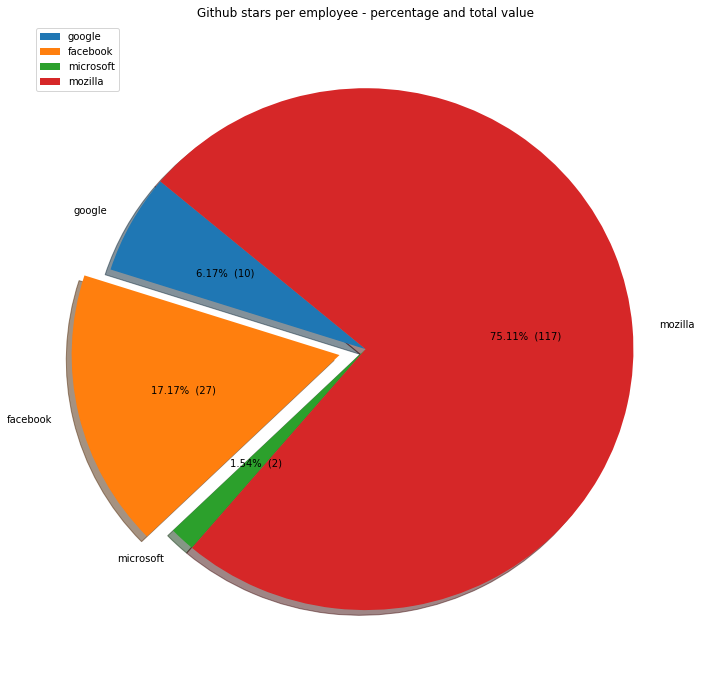

In [205]:
explode = (0, 0.1, 0, 0)
stars_with_employees[["stars_per_employee", "Company"]].set_index("Company").plot(kind="pie", y="stars_per_employee", autopct=make_autopct(stars_with_employees["stars_per_employee"]),
                 explode=explode, shadow=True, startangle=140, figsize=(12,12), title="Github stars per employee - percentage and total value")
plt.ylabel('')
plt.savefig('data/github-companies/stars_per_employee.png')

In [208]:
language = data[["Company", "Language", "Stars"]].copy()
language.head()

,Company,Language,Stars
0,google,CSS,31983
1,google,HTML,28842
2,google,C++,20987
3,google,Java,19760
4,google,HTML,17713


In [210]:
language_google = language[language["Company"] == "google"].copy()
language_google_by_stars = language_google.groupby(["Language"]).sum().sort_values("Stars", ascending=False)
language_google_by_stars[~language_google_by_stars.index.isin(["HTML", "CSS"])].head()

,Stars
Language,
Java,176994
C++,107751
Go,59624
JavaScript,53270
Python,47402


In [211]:
def filter_by_company(df, company):
    return df[df["Company"] == company].copy()

def group_by_language_stars(df):
    return df.groupby(["Language"]).sum().sort_values("Stars", ascending=False)

def languages_pie(df, company):
    explode = (0.1, 0, 0, 0, 0)
    df[~df.index.isin(["HTML", "CSS"])].iloc[:5].plot(kind="pie", y="Stars", autopct=make_autopct(df["Stars"]),
                     explode=explode, shadow=True, startangle=140, figsize=(12,12), title="Top languages used on github at $\\bf{}$ (multiplied by number of stars)".format(company))
    plt.ylabel('')
    plt.savefig('data/github-companies/languages_at_{}.png'.format(company))



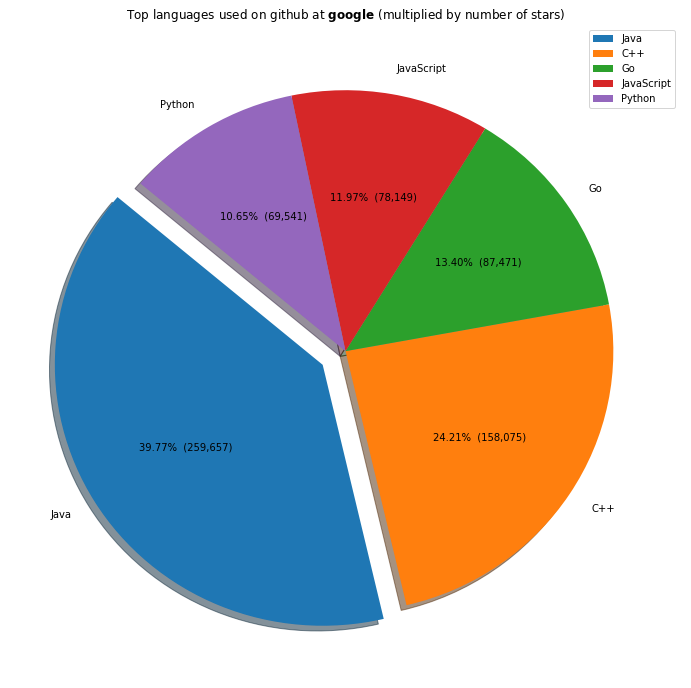

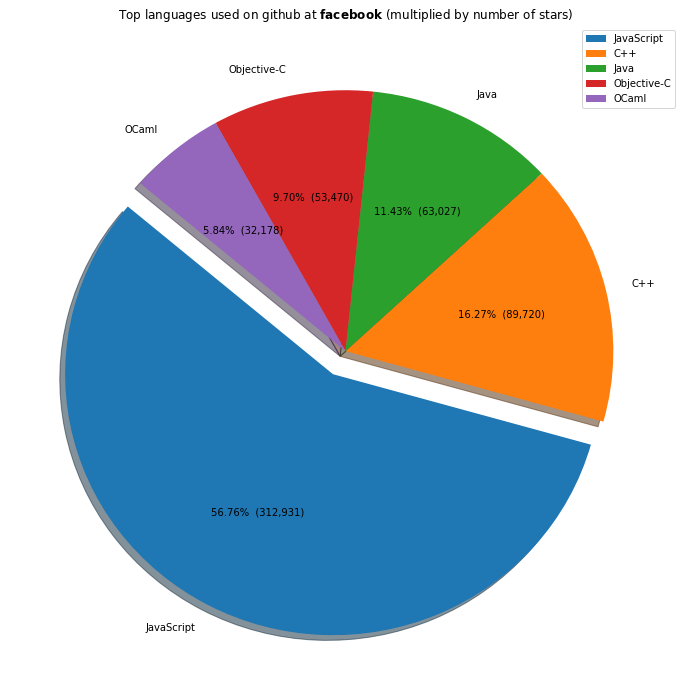

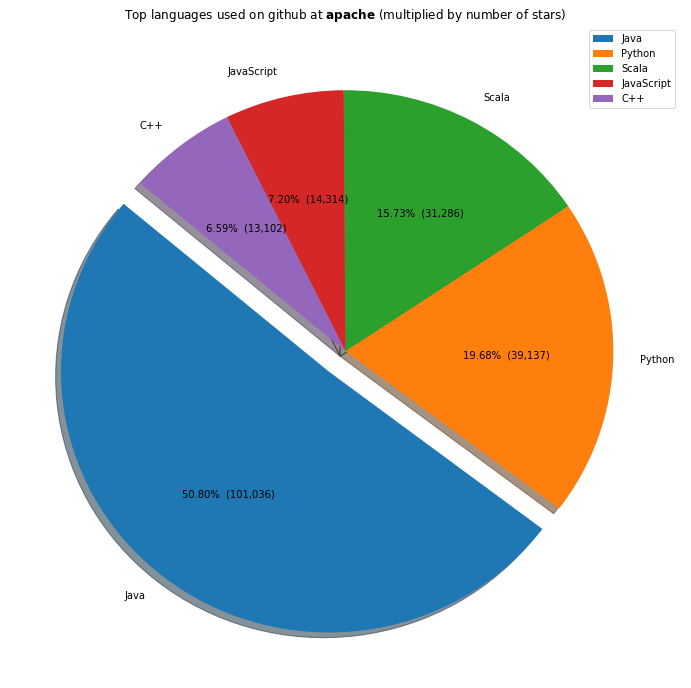

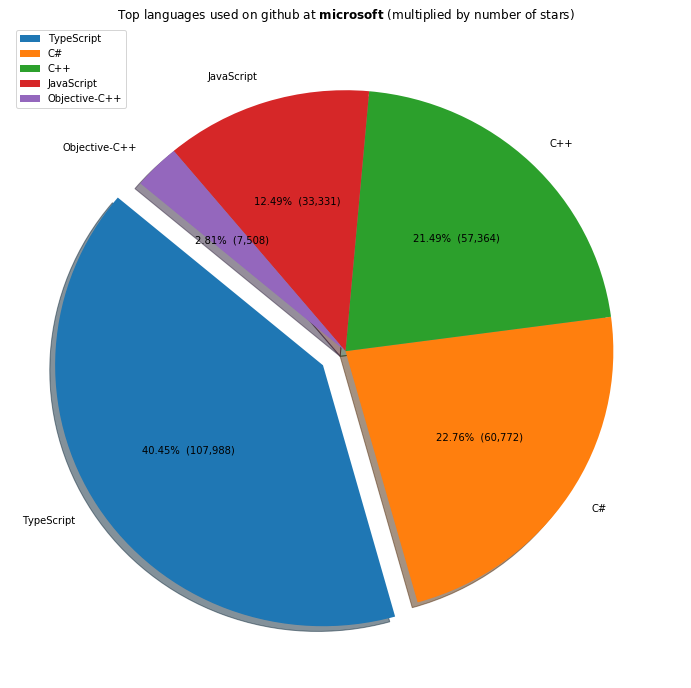

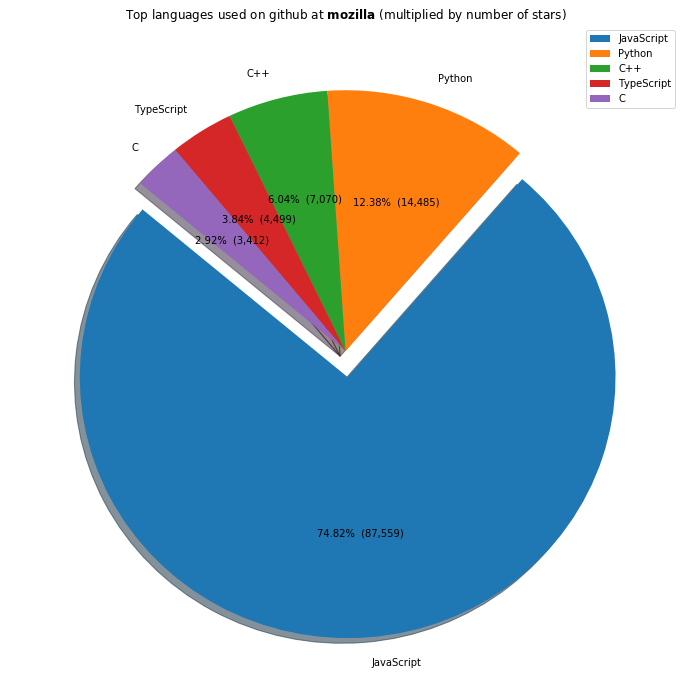

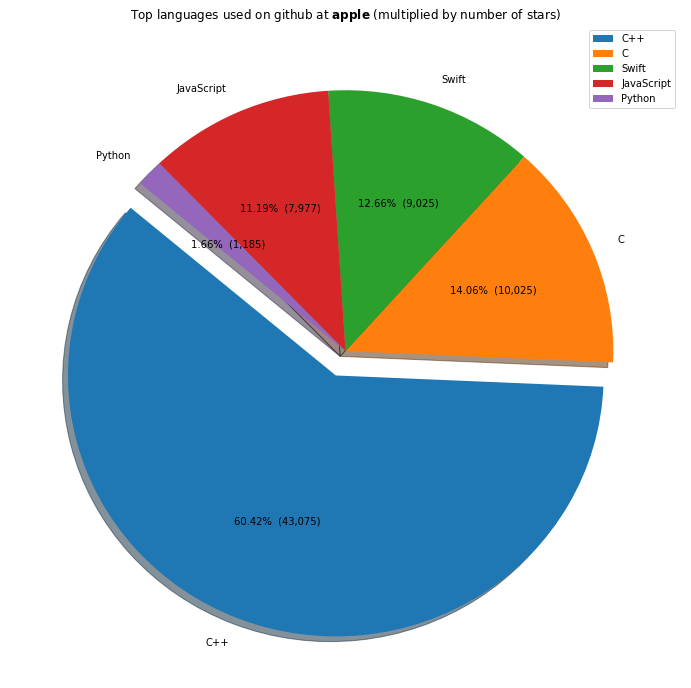

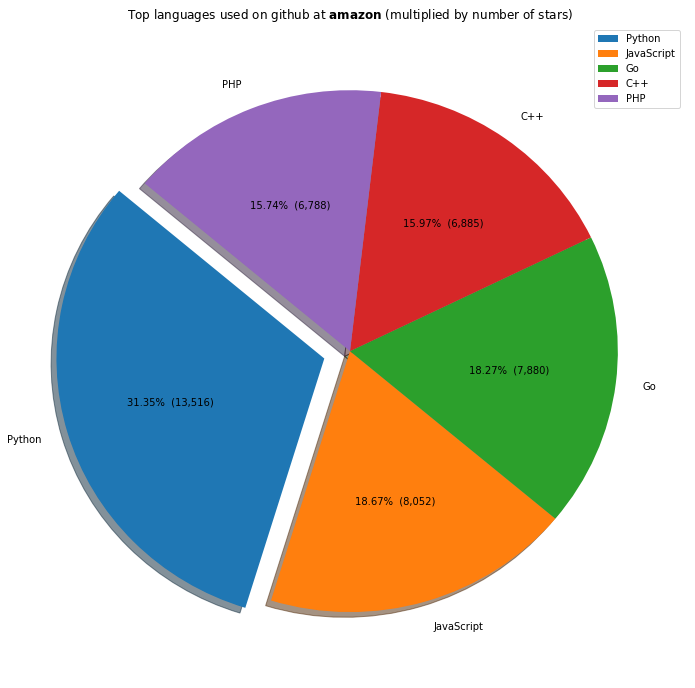

In [216]:
company_lists = ["google", "facebook", "apache", "microsoft", "mozilla", "apple", "amazon"]

for company in company_lists:
    (language.pipe(filter_by_company, company=company)
        .pipe(group_by_language_stars)
        .pipe(languages_pie, company)
    )
